In [8]:
#Reading the Dataset

import pandas as pd 
df = pd.read_csv("./data/train.csv")
df.head()

# Selected conda environment was successfully activated, even though "(venv)" indicator may not be present in the 
# terminal prompt. Learn more.

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [5]:
# CHECKING IF THERE ARE ANY MISSING VALUES IN THE DATASET

df.isna().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
# SINCE THERE ARE NO MISSING VALUES, NEXT STEP WOULD BE TO SEPARATE 
# OUT NUMERICAL & CATEGORICAL COLUMNS


numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']
Categorical Columns : []


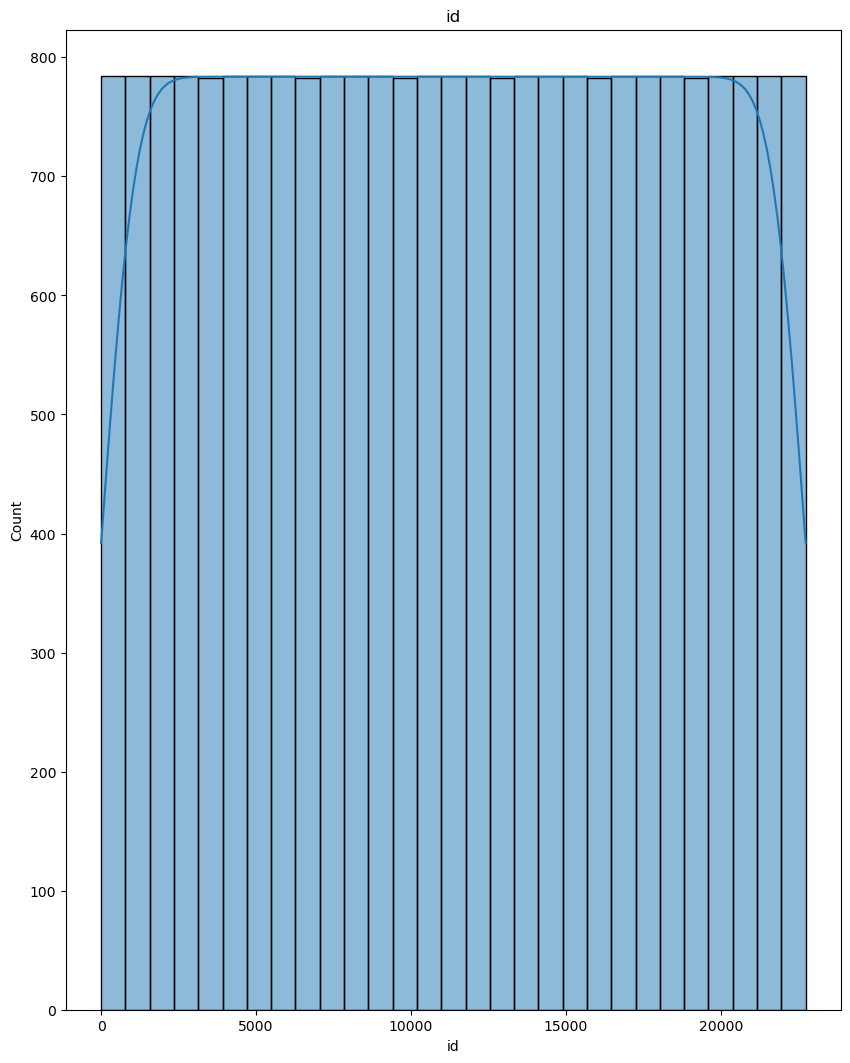

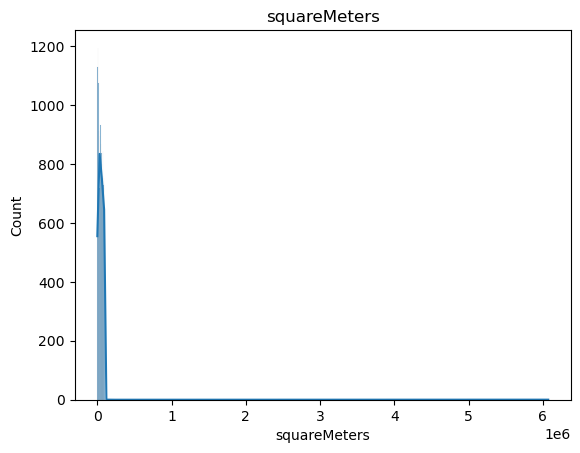

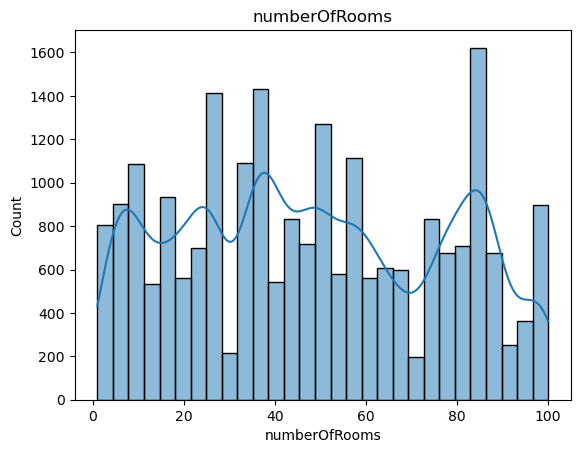

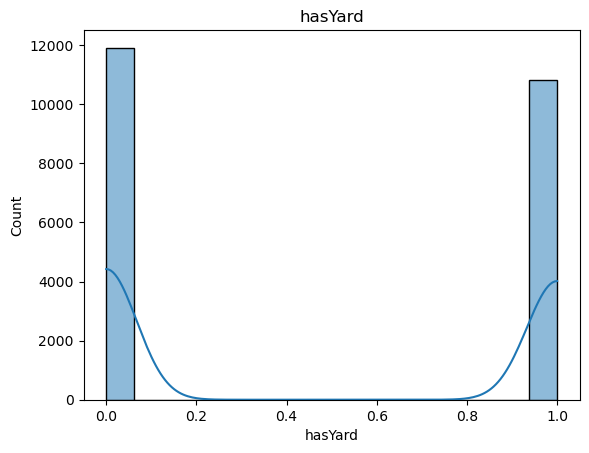

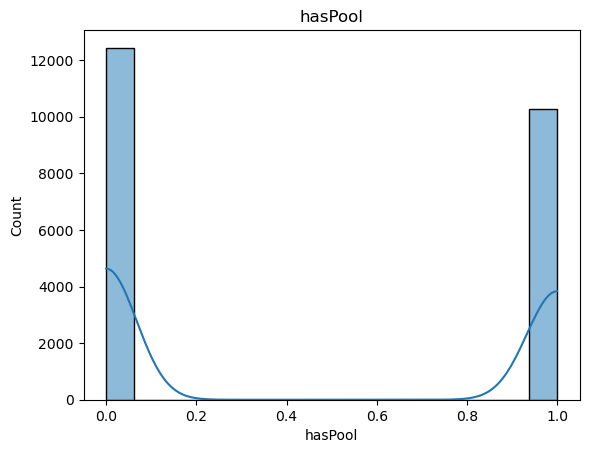

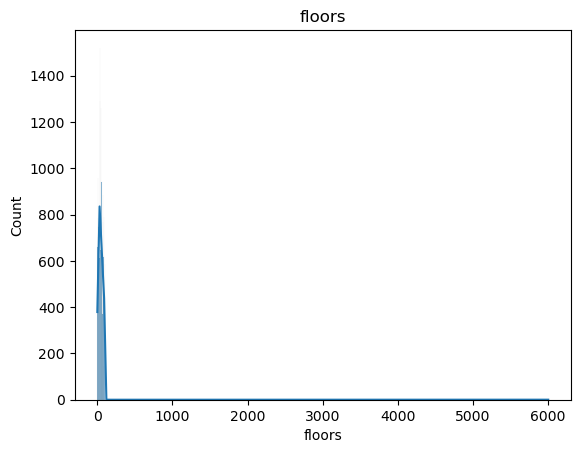

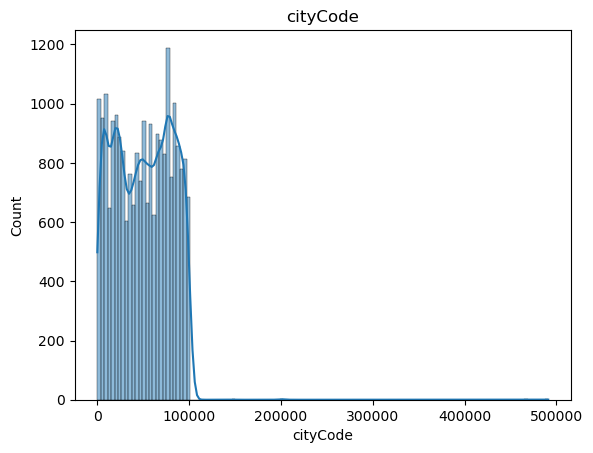

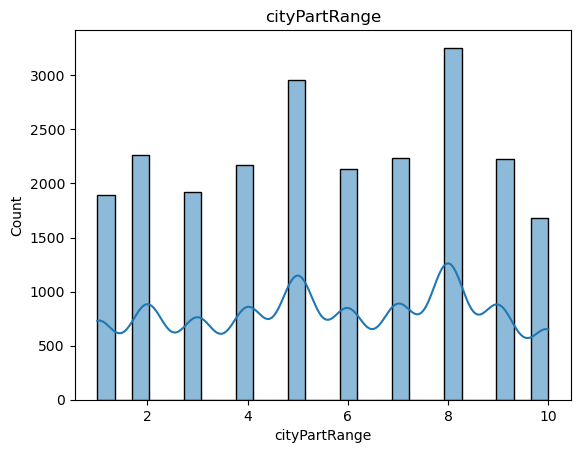

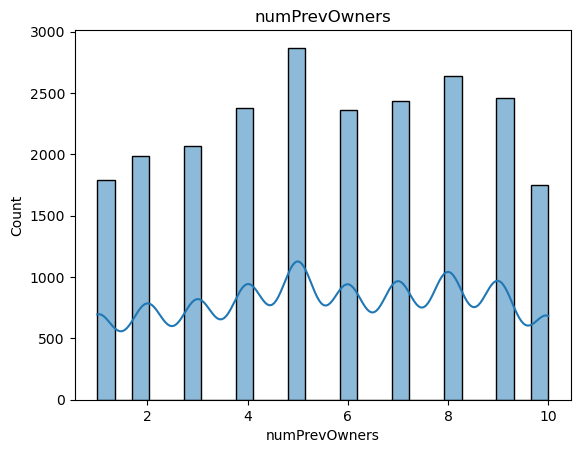

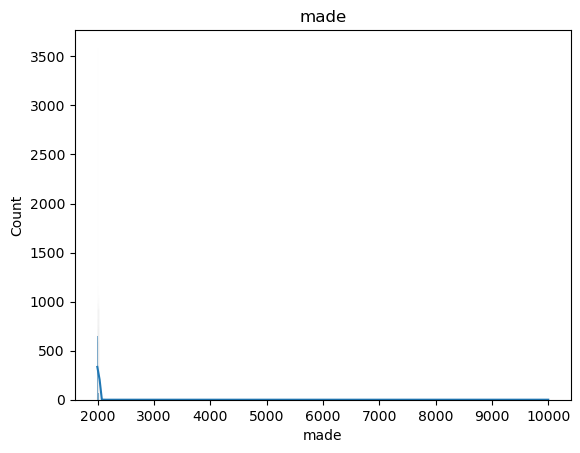

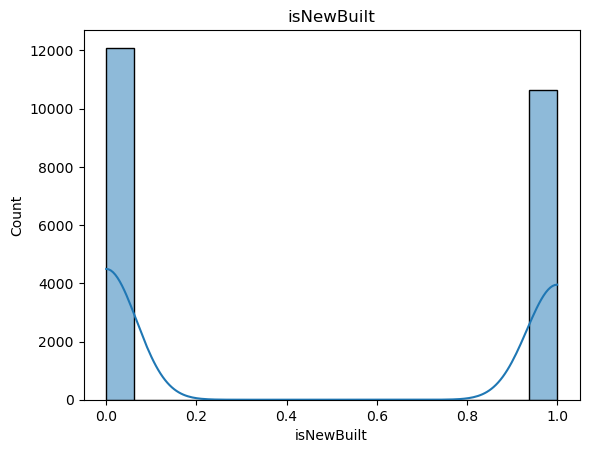

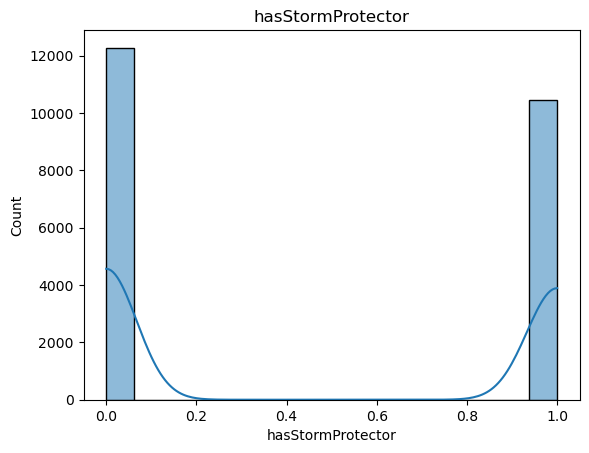

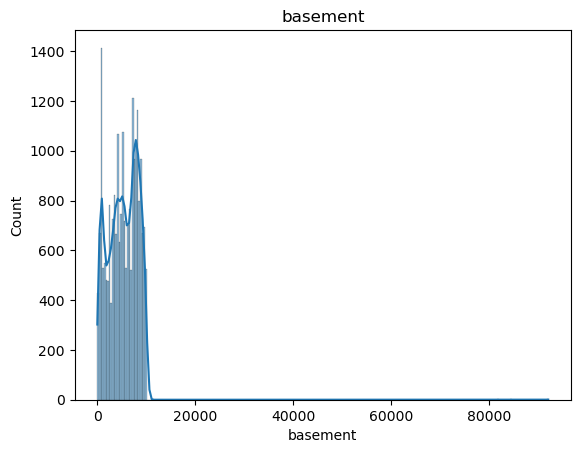

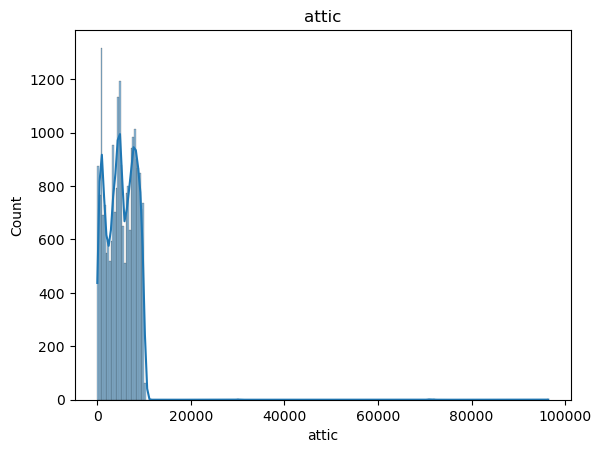

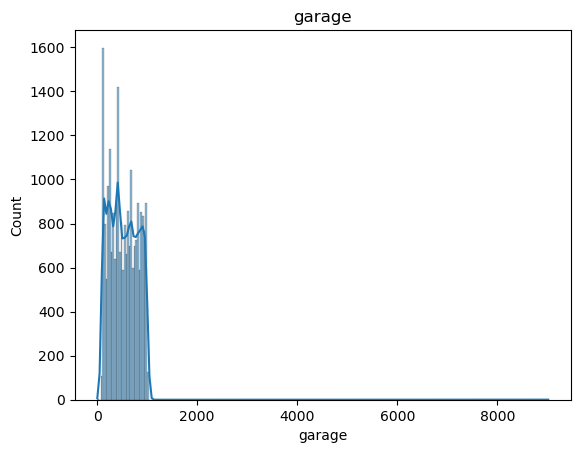

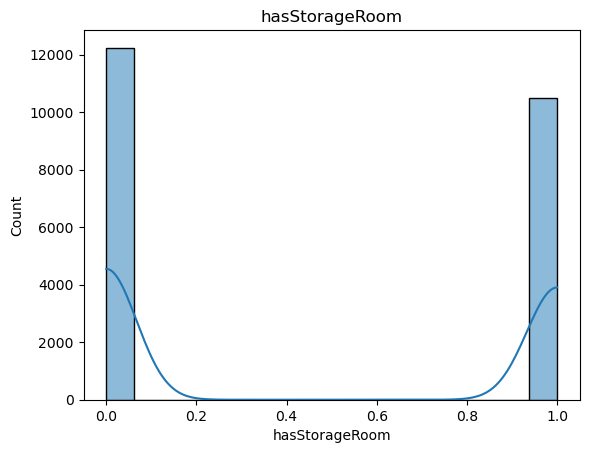

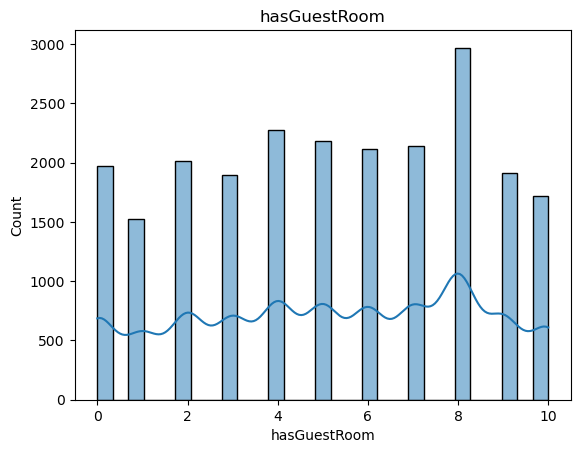

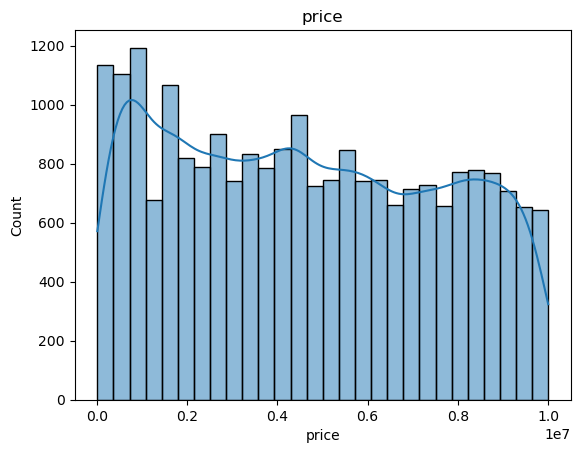

In [8]:
# Univariate Analysis of Numerical Variables

import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

In [4]:
# DROPPING THE ID COLUMN AS IT DOESN'T PROVIDE ANY CRUCIAL INFO
df = df.drop(labels=['id'],axis=1)

# Numerical Columns Description
df.describe().T


,count,mean,std,min,25%,50%,75%,max
squareMeters,22730.0,4.658622e+04,4.952124e+04,89.0,20392.75,44484.0,71547.0,6071330.0
numberOfRooms,22730.0,4.824109e+01,2.822643e+01,1.0,25.00,47.0,75.0,100.0
hasYard,22730.0,4.758909e-01,4.994294e-01,0.0,0.00,0.0,1.0,1.0
hasPool,22730.0,4.527497e-01,4.977733e-01,0.0,0.00,0.0,1.0,1.0
floors,22730.0,4.730598e+01,4.777721e+01,1.0,25.00,45.0,69.0,6000.0
cityCode,22730.0,5.001380e+04,3.000664e+04,3.0,22936.00,50414.0,76291.0,491100.0
cityPartRange,22730.0,5.585042e+00,2.739533e+00,1.0,3.00,6.0,8.0,10.0
numPrevOwners,22730.0,5.620766e+00,2.713026e+00,1.0,3.00,6.0,8.0,10.0
made,22730.0,2.008005e+03,1.188268e+02,1990.0,2000.00,2006.0,2014.0,10000.0
isNewBuilt,22730.0,4.679718e-01,4.989841e-01,0.0,0.00,0.0,1.0,1.0


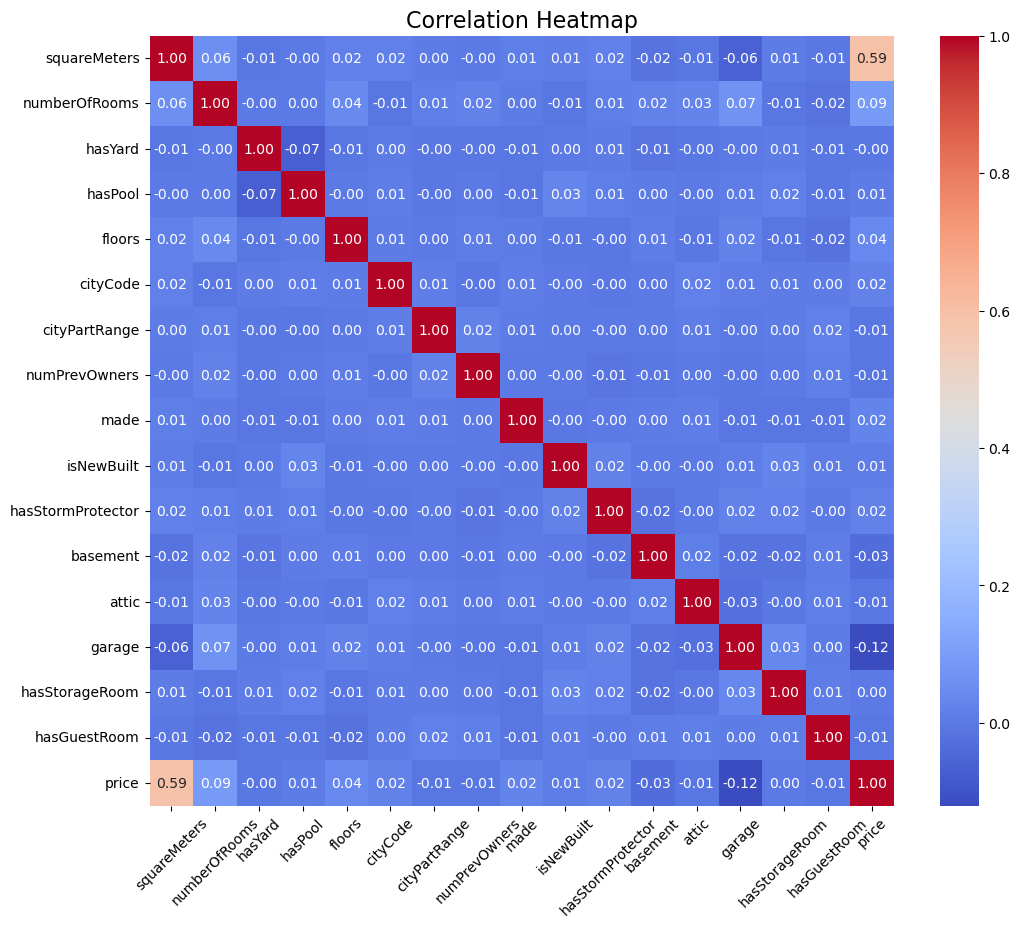

In [12]:
# Correlation heatmap
# sb.heatmap(df.corr(numeric_only=True),annot=True)
# sb.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", cbar=True)
plt.figure(figsize=(12, 10))  # Adjust width and height as needed

# Plot the heatmap
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Show the heatmap
plt.title("Correlation Heatmap", fontsize=16)  # Optional: Add a title for clarity
plt.xticks(fontsize=10, rotation=45)  # Adjust x-axis tick font size and rotation
plt.yticks(fontsize=10, rotation=0) 
plt.show()

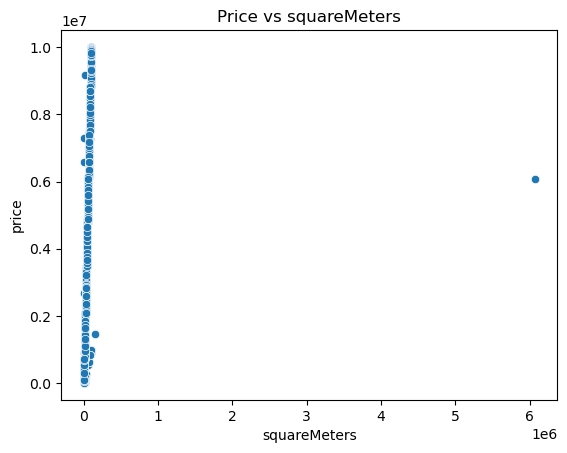

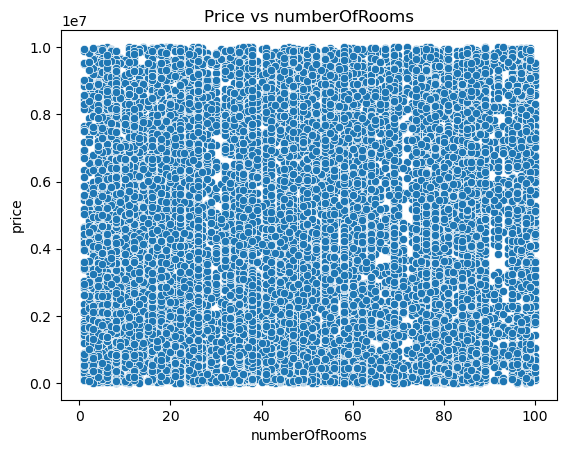

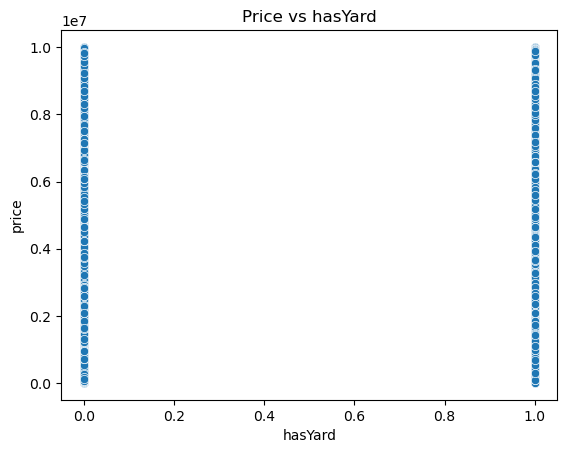

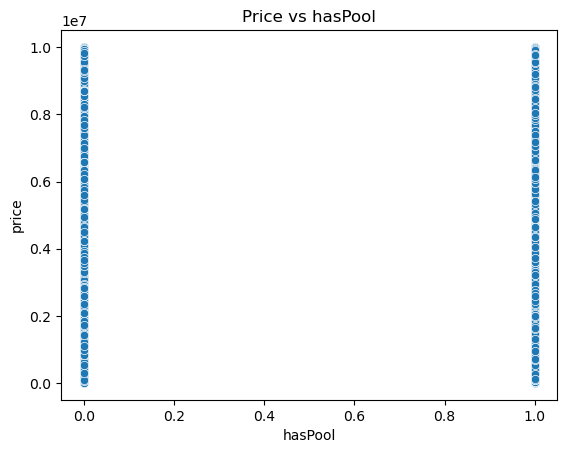

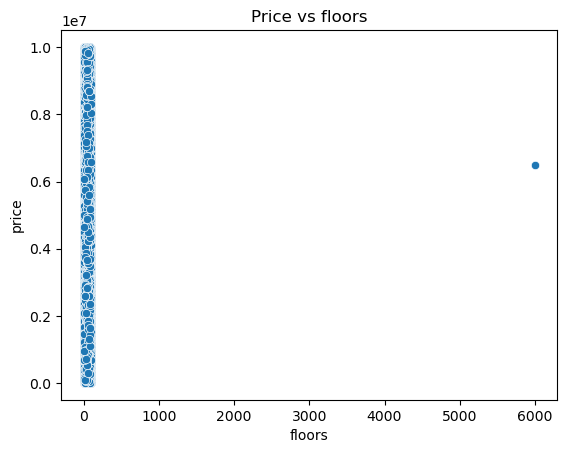

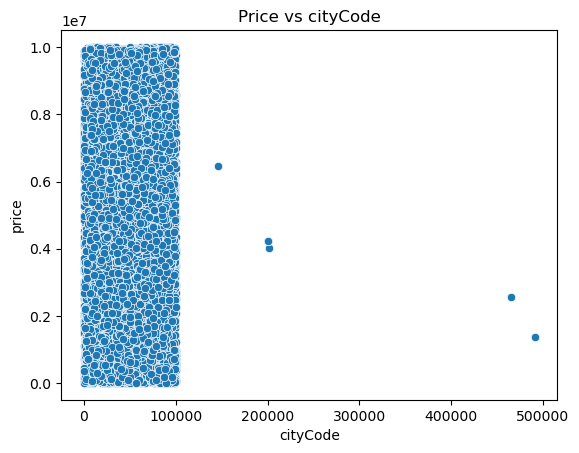

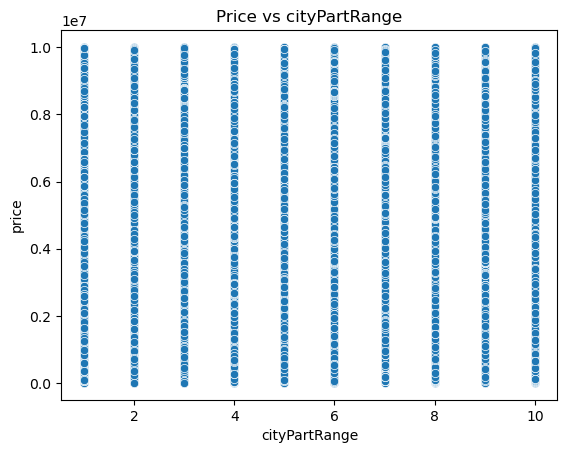

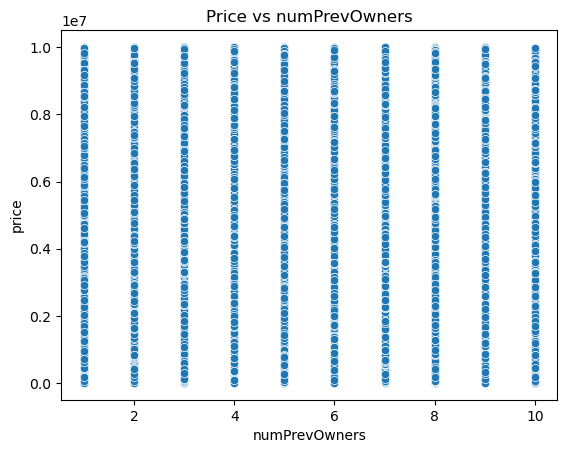

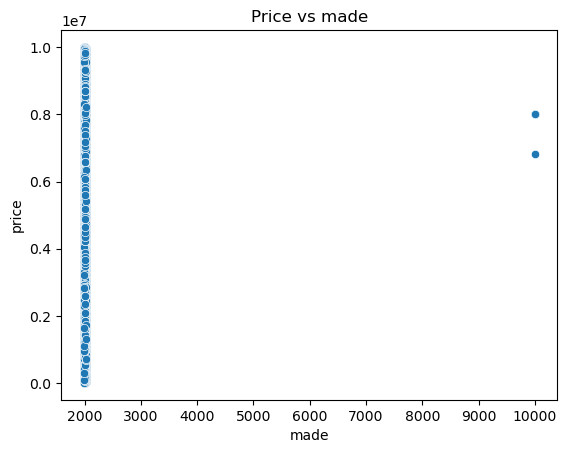

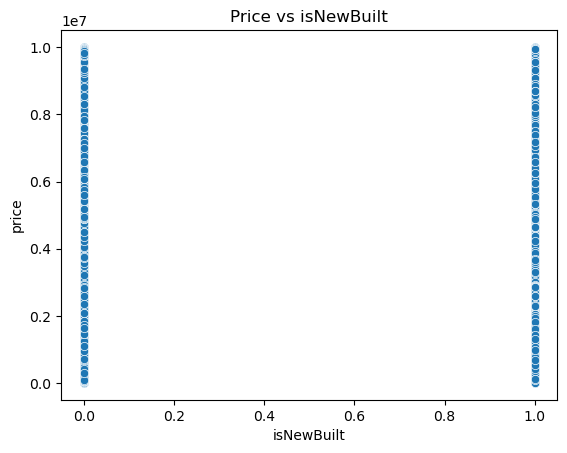

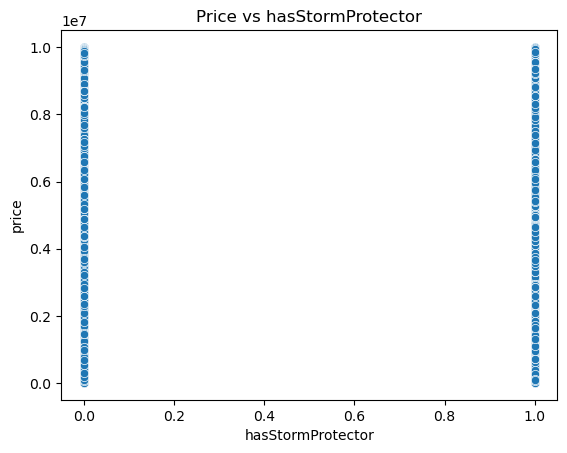

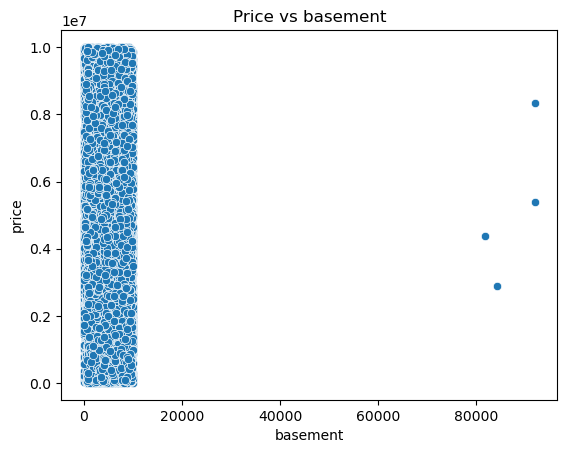

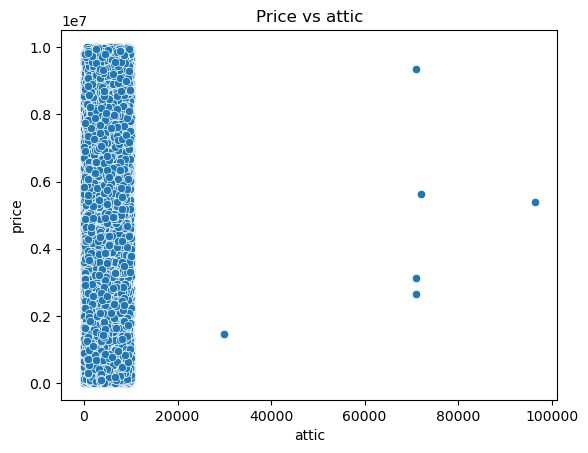

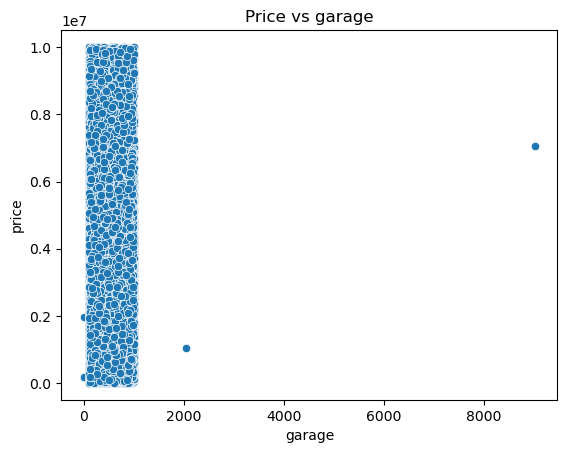

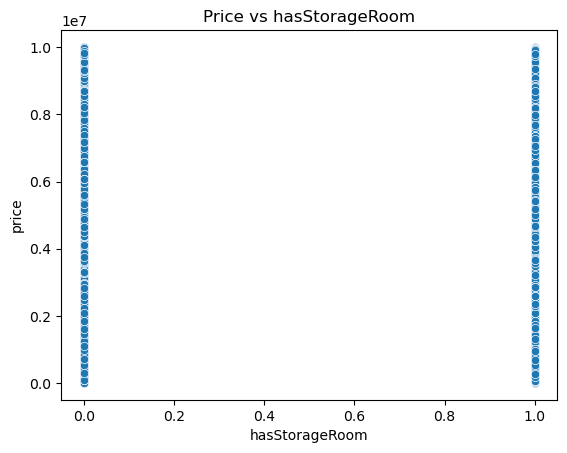

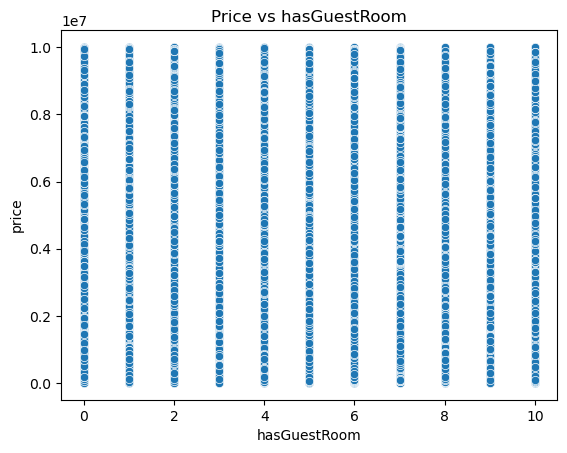

In [13]:
# TRYING SCATTER PLOT ANALYSIS:
for col in df.columns:
    if col != "price":
        plt.figure()
        sb.scatterplot(x=df[col], y=df["price"])
        plt.title(f"Price vs {col}")
        plt.show()

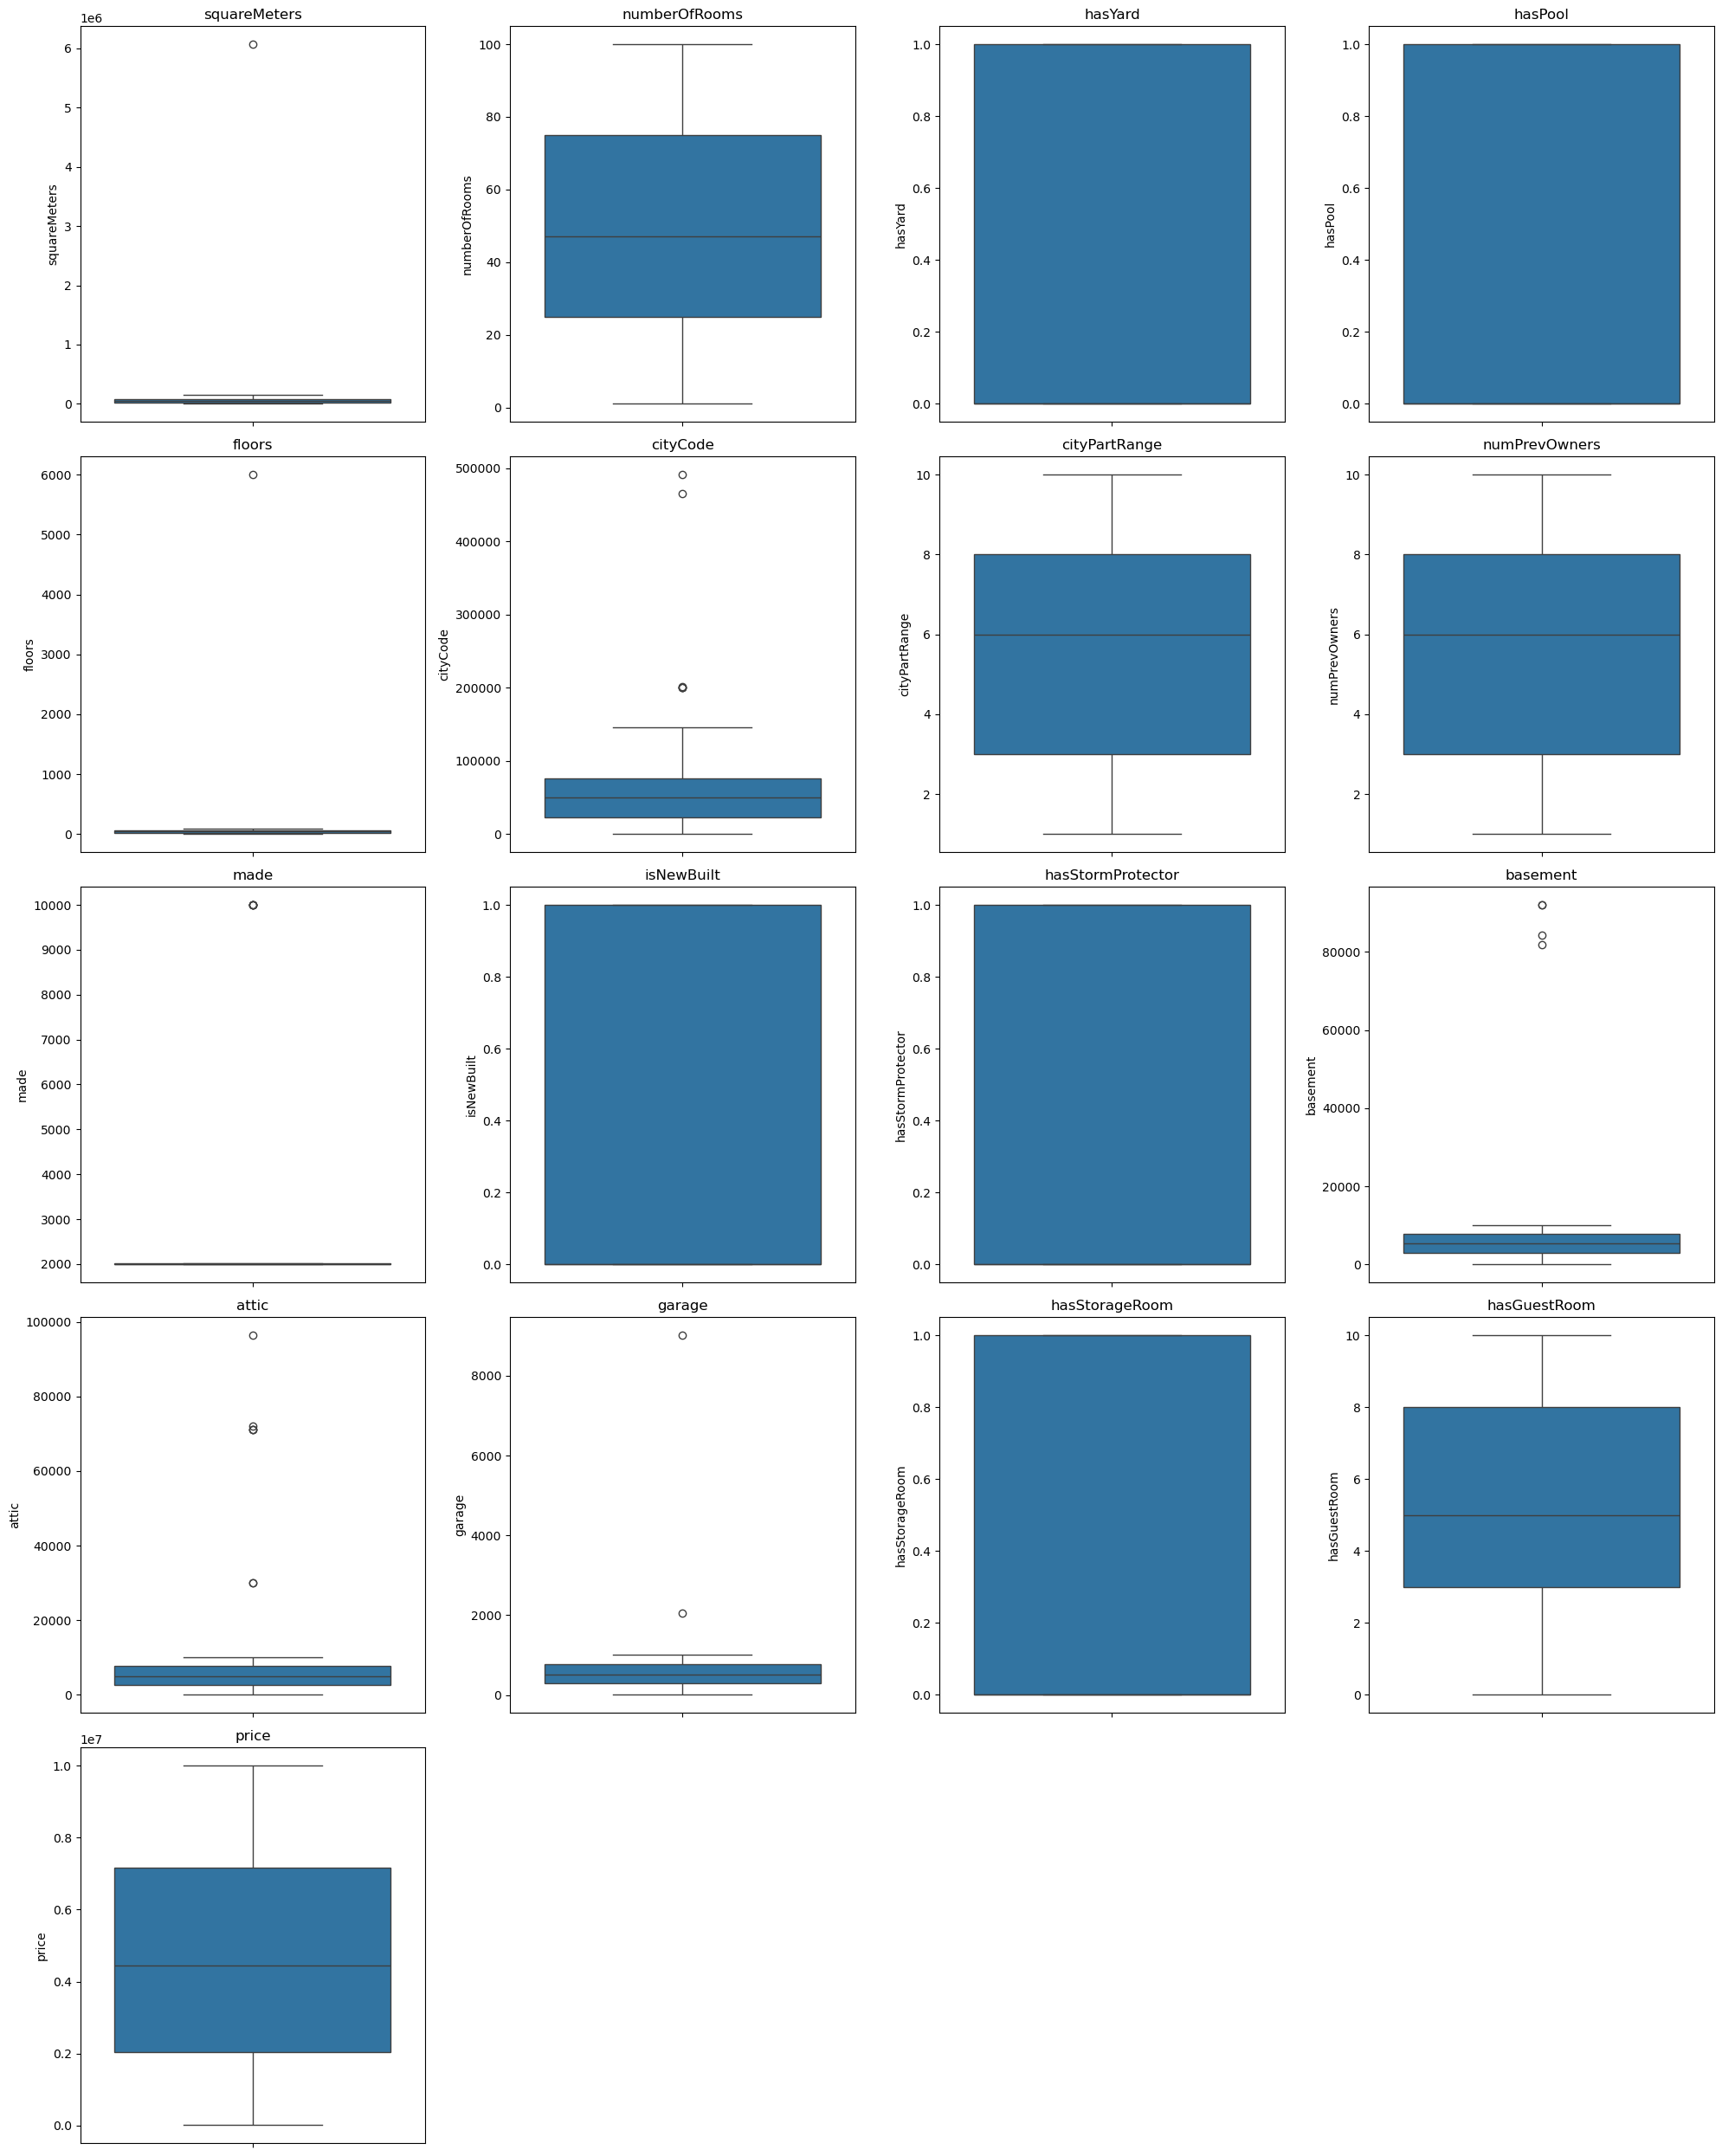

In [17]:
# PERFORMING OUTLIER DETECTION AND REMOVAL

# for i in list(df.columns):
#     sb.boxplot(data=df, x=i , y='price')
#     plt.show()
import math 

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dynamically determine grid size (rows x columns)
num_cols = len(numeric_columns)
cols_per_row = 4  # Number of plots per row
num_rows = math.ceil(num_cols / cols_per_row)  # Calculate number of rows needed

# Set up the figure
plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Adjust figure size dynamically

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  # Define subplot position
    sb.boxplot(y=df[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
df2 = df.copy()

# Define the columns to remove outliers from
columns_to_clean = ['floors', 'squareMeters', 'attic', 'basement', 'garage']

# Define the lower and upper percentile thresholds
lower_percentile = 1  # 1st percentile
upper_percentile = 99  # 99th percentile

# Remove extreme outliers
for col in columns_to_clean:
    lower_limit = df[col].quantile(lower_percentile / 100)
    upper_limit = df[col].quantile(upper_percentile / 100)
    # Filter out rows where the value is outside the percentile range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

# Check the updated DataFrame
print(df.shape)

(20726, 17)


In [6]:
# Seperating X and Y

X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

print(Y.shape)
# Y.head()

(20726, 1)


In [24]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

squareMeters         1.315376
numberOfRooms        0.198034
garage               0.177466
floors               0.169255
cityCode             0.162666
attic                0.125669
hasGuestRoom         0.099200
numPrevOwners        0.089840
hasPool              0.062942
hasYard              0.062496
basement             0.056637
cityPartRange        0.052962
isNewBuilt           0.040657
hasStormProtector    0.029813
hasStorageRoom       0.028180
made                 0.002307
Name: MI Scores, dtype: float64


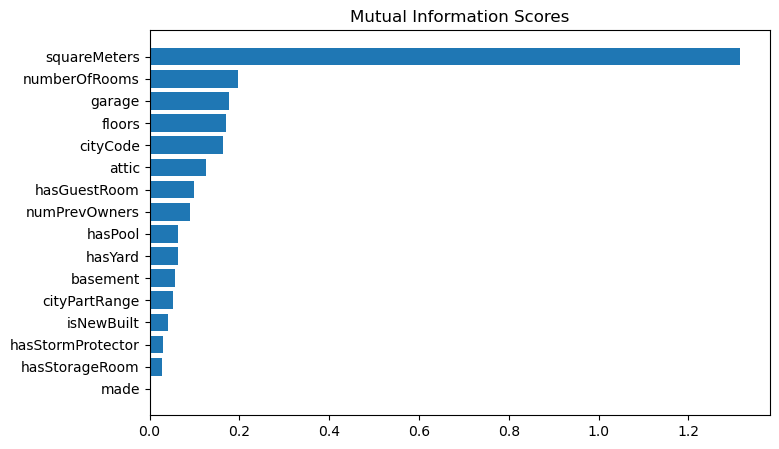

In [25]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))

# Using the above defined function
plot_mi_scores(mi_scores)

In [7]:
# Save the updated DataFrame to a CSV file
df.to_csv('./data/updated_data.csv', index=False)

print("Data saved successfully to updated_data.csv")

Data saved successfully to updated_data.csv
